In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from cycler import cycler


import os
import json

from cylinder import create_rotated_cylinder_mask

In [4]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [11]:
energy = 150*(10**-3)*667*np.pi*0.5*0.5*100 # 150mW/cm^2 * 667 s * beam surface cm2 * 100 mm2 to cm2 
cylinder_radius = 1
cylinder_height = 22
dims = [600, 600, 600]

model_name = "/home/raise/mcx_simulation/analysis_sensitivity/test_res"
with open("/home/mbpl/morizane/analysis_sensitivity/test_res.mc2") as f:
    data = np.fromfile(f, dtype=np.float32).reshape((600, 600, 600), order='F')

## model 読み込み

In [9]:


with open(f"/home/mbpl/morizane/analysis_sensitivity/089_tumour_model.bin", 'rb') as f:
    model = np.fromfile(f, dtype=np.uint8).reshape([600, 600, 600], order='F')



## 二次元分布

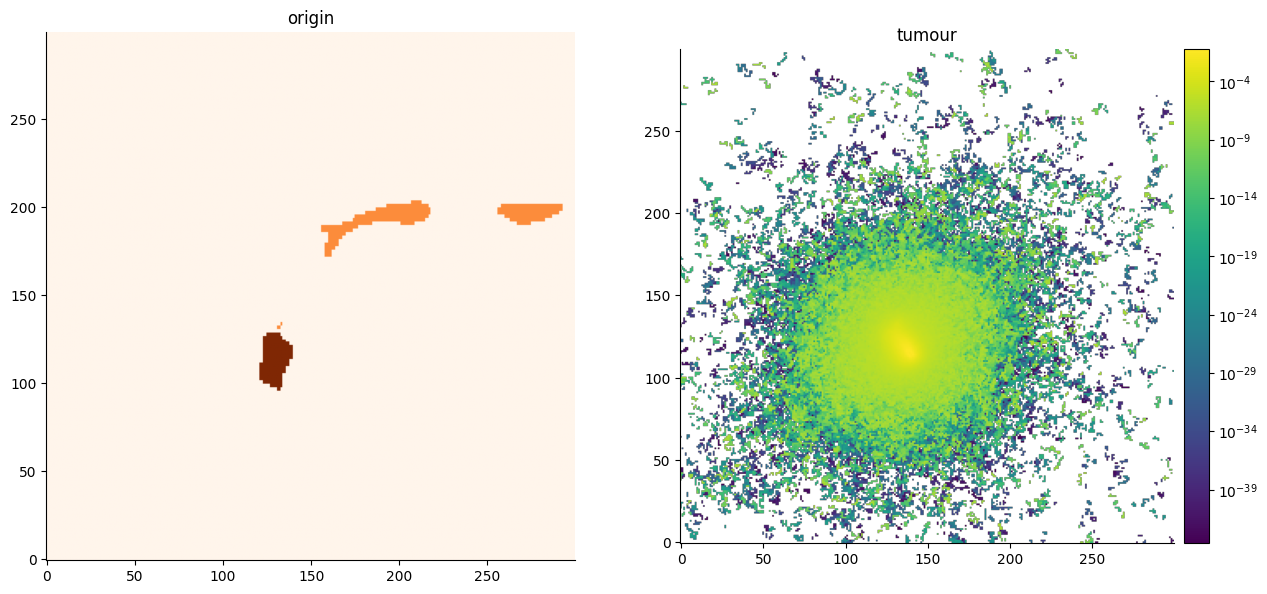

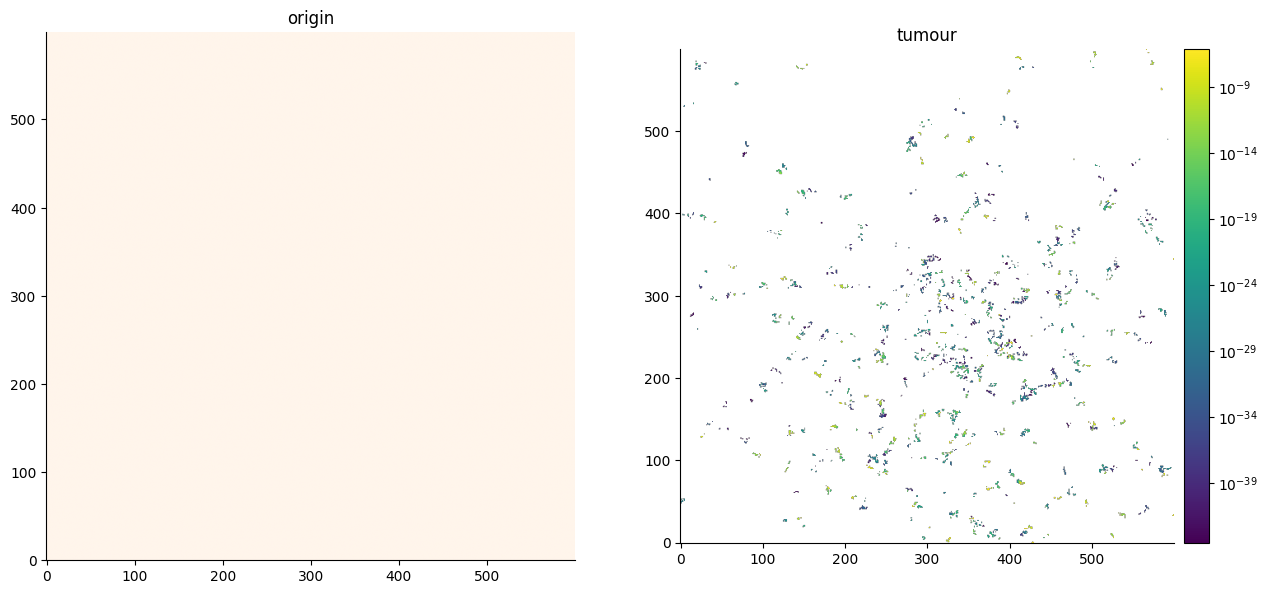

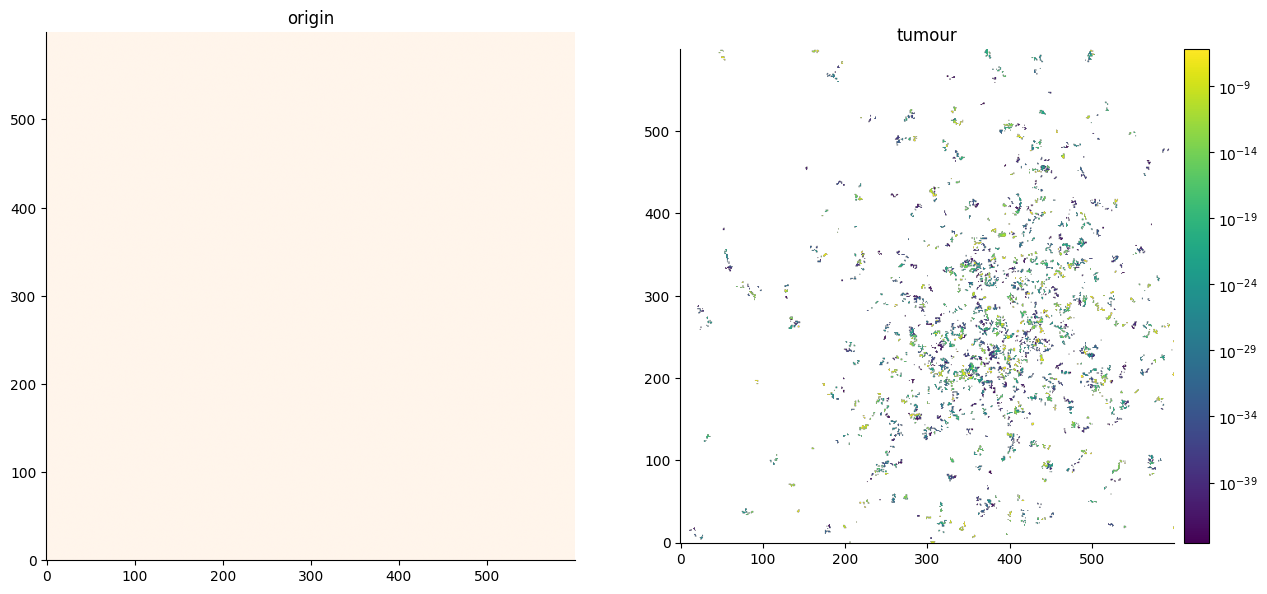

In [16]:
nx, ny, nz = 249, 250, 250

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(model[:,300:600,250:550][nx,:,:],origin="lower",cmap='Oranges')
axs[0].set_title("origin")

a = axs[1].imshow(data[:,300:600,250:550][nx,:, :],origin="lower", norm=LogNorm())
axs[1].set_title("tumour")
divider = make_axes_locatable(axs[1]) #axに紐付いたAxesDividerを取得
cax = divider.append_axes("right", size="5%", pad=0.1) #append_axesで新しいaxesを作成
cbar = fig.colorbar(a, cax=cax)  # カラーバーのサイズをaxs[0]のサイズに合わせる

plt.show()


fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(model[:,ny,:],origin="lower",cmap='Oranges')
axs[0].set_title("origin")

a = axs[1].imshow(data[:,ny, :],origin="lower", norm=LogNorm())
axs[1].set_title("tumour")
divider = make_axes_locatable(axs[1]) #axに紐付いたAxesDividerを取得
cax = divider.append_axes("right", size="5%", pad=0.1) #append_axesで新しいaxesを作成
cbar = fig.colorbar(a, cax=cax)  # カラーバーのサイズをaxs[0]のサイズに合わせる
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(model[:,:,nz],origin="lower",cmap='Oranges')
axs[0].set_title("origin")

a = axs[1].imshow(data[:,:,nz],origin="lower", norm=LogNorm())
axs[1].set_title("tumour")
divider = make_axes_locatable(axs[1]) #axに紐付いたAxesDividerを取得
cax = divider.append_axes("right", size="5%", pad=0.1) #append_axesで新しいaxesを作成
cbar = fig.colorbar(a, cax=cax)  # カラーバーのサイズをaxs[0]のサイズに合わせる
plt.show()

## DVH

In [ ]:
c = plt.get_cmap("Set2")
colors = c(np.arange(0, c.N))
# colors = [c(1.*i/7) for i in range(3)]
plt.rcParams["axes.prop_cycle"] = cycler("color", colors)

fig, axs = plt.subplots(1,3, figsize=(16, 5))

for ax_num, res in enumerate([[data, "total"], [data1, "1st irrad"], [data2, "2nd irrad"]]):
    cum_rel_dvh_t, cum_rel_dvh_b, cum_rel_dvh_l, bin_edges = calc_log_dvh_with_log(res[0], model)
    axs[ax_num].plot(bin_edges[:-1], cum_rel_dvh_b, label='Bronchi')
    axs[ax_num].plot(bin_edges[:-1], cum_rel_dvh_t, label='Tumour')
    axs[ax_num].plot(bin_edges[:-1], cum_rel_dvh_l, label='Lung Tissue')
    axs[ax_num].set_xlabel('Dose [J/cm2]')
    axs[ax_num].set_ylabel('Volume [%]')
    axs[ax_num].set_xscale('log')
    axs[ax_num].set_title(res[1])
    axs[ax_num].legend()
    

plt.show()